# Text Analytics and Natural Language Processing using Graphs

In the following we will focus on analyzing textual documents and leverage on graph analysis in order to identify insight and extract relevant information. 

In particular in the following we will show you how to:

* Extract structured information from text by using NLP techniques and models
* Build different type of graphs starting from the information extracted in the previous point
* Analyze the graph

### Load Dataset

In [1]:
import nltk 

In [2]:
import numpy as np

import pandas as pd
import networkx as nx

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to /home/deusebio/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [5]:
from nltk.corpus import reuters

In [6]:
corpus = pd.DataFrame([
    {"id": _id, "clean_text": reuters.raw(_id).replace("\n", ""), "label": reuters.categories(_id)}
    for _id in reuters.fileids()
]).set_index("id")

In [7]:
corpus.iloc[10]["clean_text"]

'SUBROTO SAYS INDONESIA SUPPORTS TIN PACT EXTENSION  Mines and Energy Minister Subroto  confirmed Indonesian support for an extension of the sixth  International Tin Agreement (ITA), but said a new pact was not  necessary.      Asked by Reuters to clarify his statement on Monday in  which he said the pact should be allowed to lapse, Subroto said  Indonesia was ready to back extension of the ITA.      "We can support extension of the sixth agreement," he said.  "But a seventh accord we believe to be unnecessary."      The sixth ITA will expire at the end of June unless a  two-thirds majority of members vote for an extension.  '

In [8]:
from collections import Counter
len(Counter([label for document_labels in corpus["label"] for label in document_labels]).most_common())

90

In [9]:
corpus.head()

,clean_text,label
id,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade]
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain]
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]"
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]"
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]"


### Language Detection

In [10]:
import langdetect

In [11]:
import numpy as np

def getLanguage(text: str):
    try:
        return langdetect.detect(text)
    except: 
        return np.nan

In [12]:
corpus["language"] = corpus["clean_text"].apply(getLanguage)

In [13]:
corpus["language"].value_counts().head(10)

language
en    9900
sv     429
de     373
sw      29
so      23
nl       9
pt       8
vi       5
et       4
sl       3
Name: count, dtype: int64

In [14]:
corpus.head()

,clean_text,label,language
id,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en


Using fasttext

In [15]:
!curl -w GET https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz > lid.176.ftz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  916k  100  916k    0     0  1364k      0 --:--:-- --:--:-- --:--:-- 1363k


In [16]:
import fasttext

m = fasttext.load_model("lid.176.ftz")
def getLanguage(text: str):
    return m.predict(text)[0][0].replace("__label__", "")

In [17]:
corpus["language"] = corpus["clean_text"].apply(getLanguage)

In [18]:
corpus["language"].value_counts().head(10)

language
en    10278
de       90
ja       73
it       67
sv       52
zh       48
es       31
fr       27
eu       20
eo       12
Name: count, dtype: int64

In [19]:
corpus["language"].value_counts().head(10)

language
en    10278
de       90
ja       73
it       67
sv       52
zh       48
es       31
fr       27
eu       20
eo       12
Name: count, dtype: int64

In [20]:
corpus[corpus["language"]=="ja"].iloc[5]["clean_text"]

'USDA - U.S. 1986/87 ENDING CORN STOCKS  5,240 MLN BU, WHEAT 1,848 MLN, SOYBEANS 610 MLN  USDA - U.S. 1986/87 ENDING CORN STOCKS  5,240 MLN BU, WHEAT 1,848 MLN, SOYBEANS 610 MLN  '

### NLP Enrichment

In [21]:
import spacy

In order to download the model from the Spacy library, please issue the following command in a shell 


<pre><code>
python -m spacy download en_core_web_md
</code></pre>


In [23]:
nlp = spacy.load('en_core_web_md')

In [24]:
corpus["parsed"] = corpus["clean_text"].apply(nlp)

In [25]:
corpus.loc["test/14832"]["clean_text"]

"THAI TRADE DEFICIT WIDENS IN FIRST QUARTER  Thailand's trade deficit widened to 4.5  billion baht in the first quarter of 1987 from 2.1 billion a  year ago, the Business Economics Department said.      It said Janunary/March imports rose to 65.1 billion baht  from 58.7 billion. Thailand's improved business climate this  year resulted in a 27 pct increase in imports of raw materials  and semi-finished products.      The country's oil import bill, however, fell 23 pct in the  first quarter due to lower oil prices.      The department said first quarter exports expanded to 60.6  billion baht from 56.6 billion.      Export growth was smaller than expected due to lower  earnings from many key commodities including rice whose  earnings declined 18 pct, maize 66 pct, sugar 45 pct, tin 26  pct and canned pineapples seven pct.      Products registering high export growth were jewellery up  64 pct, clothing 57 pct and rubber 35 pct.  "

In [26]:
from spacy import displacy

In [27]:
displacy.render(corpus.loc["test/14832"]["parsed"], style='ent', jupyter=True)

#### Export corpus Dataframe

In [28]:
corpus.head()

,clean_text,label,language,parsed
id,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA..."
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC..."
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM..."
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR..."
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,..."


In [29]:
corpus[["clean_text", "label", "language", "parsed"]].to_pickle("corpus.p")

## Graph Generation

In the following, we will show you how to create two different kind of graphs out of a corpus of documents:

* Knowledge base graphs, where the subject-verb-object relation will be encoded to build a semantic graph 
* Bipartite graphs, linking documents with the entities/keywords appearing therein

### Knowledge base

In [30]:
import pandas as pd

corpus = pd.read_pickle("corpus.p")

In [31]:
from subject_object_extraction import findSVOs

In [32]:
corpus["triplets"] = corpus["parsed"].apply(lambda x: findSVOs(x, output="obj"))

In [33]:
corpus.head()

,clean_text,label,language,parsed,triplets
id,,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[(EXPORTERS, (FEAR, False), DAMAGE), (Japan, (..."
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...","[(STOCKS, (showed, False), consume), (paper, (..."
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...","[(Ministry, (revise, False), outlook), (MITI, ..."
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...","[(Products, (registering, False), growth), (re..."
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...","[(oil, (told, False), reporters), (Prices, (ar..."


In [34]:
edge_list = [
    {"id": _id, "source": source.lemma_.lower(), "target": target.lemma_.lower(), "edge": edge.lemma_.lower()}
    for _id, triplets in corpus["triplets"].items()
    for (source, (edge, neg), target) in triplets
    if not any([source.is_stop, target.is_stop])
    if (source.pos_ == "PROPN" or source.pos_ == "NOUN") and (target.pos_== "PROPN" or target.pos_== "NOUN") 
]

In [35]:
len(edge_list)

37729

In [36]:
edges = pd.DataFrame(edge_list)

In [37]:
edges["source"].value_counts().head(10)

source
company       941
bank          781
net           684
government    422
agreement     418
board         398
plan          374
inc           333
group         308
japan         280
Name: count, dtype: int64

In [38]:
edges["edge"].value_counts().head(10)

edge
be         2651
include    1459
have       1386
tell       1118
buy         715
take        634
sell        563
make        556
give        522
exclude     475
Name: count, dtype: int64

In [39]:
import networkx as nx

In [40]:
G=nx.from_pandas_edgelist(edges, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [41]:
len(G.nodes)

6112

In [42]:
def plotDistribution(serie: pd.Series, nbins: int, minValue=None, maxValue=None):
    _minValue=int(np.floor(np.log10(minValue if minValue is not None else serie.min())))
    _maxValue=int(np.ceil(np.log10(maxValue if maxValue is not None else serie.max())))
    bins = [0] + list(np.logspace(_minValue, _maxValue, nbins)) + [np.inf]
    serie.hist(bins=bins)
    plt.xscale("log")
    plt.xlabel(f"log_10({serie.name})")
    plt.ylabel("Frequency")

In [43]:
def graphSummary(graph, bins=10, plot_edge_weight=False, use_log_y=True):
    print(nx.info(graph))
    plt.figure(figsize=(14 if plot_edge_weight else 6, 5 if plot_edge_weight else 4))
    if plot_edge_weight:
        plt.subplot(1,2,1)
    degrees = pd.Series({k: v for k, v in nx.degree(graph)}, name="degree")
    if use_log_y:
        plt.yscale("log")
    plotDistribution(degrees, bins)

    if plot_edge_weight:
        plt.subplot(1,2,2)
        allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in graph.edges(data=True)}, name="edge_weights")
        plotDistribution(allEdgesWeights, bins)
        if use_log_y:
            plt.yscale("log")

In [44]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 6112
Number of edges: 37729
Average in degree:   6.1729
Average out degree:   6.1729


Name: 
Type: MultiDiGraph
Number of nodes: 6112
Number of edges: 37729
Average in degree:   6.1729
Average out degree:   6.1729


/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


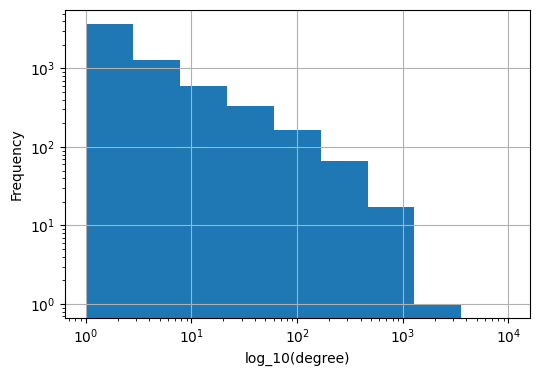

In [45]:
graphSummary(G, bins=10)

Analysis of a certain relation

In [46]:
edges.head()

,id,source,target,edge
0,test/14826,exporter,damage,fear
1,test/14826,japan,fear,raise
2,test/14826,row,damage,inflict
3,test/14826,loss,gain,be
4,test/14826,pact,semiconductor,sell


In [47]:
e = edges[(edges["source"]!=" ") & (edges["target"]!=" ") & (edges["edge"]=="lend")]

In [48]:
G=nx.from_pandas_edgelist(e, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

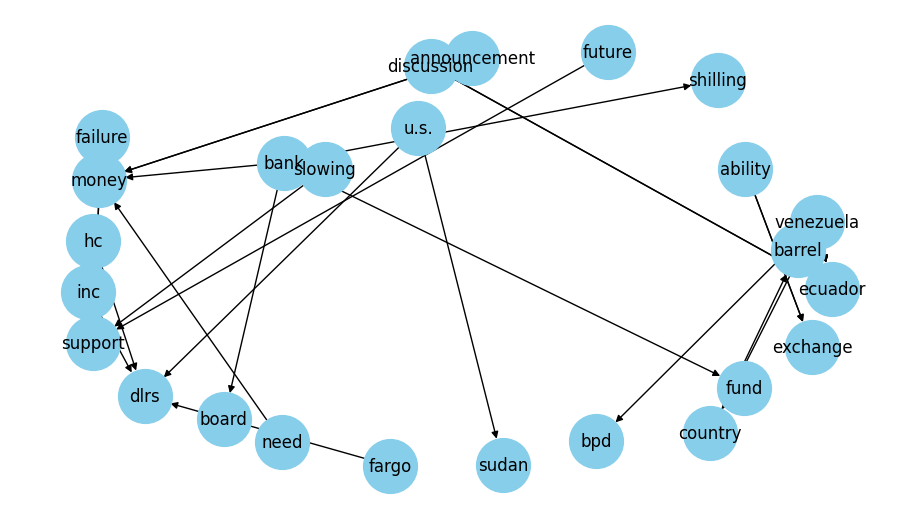

In [49]:
import os

plt.figure(figsize=(9, 5))

pos = nx.fruchterman_reingold_layout(G, k=1.6) # k regulates the distance between nodes

nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_size=12)

# plt.show()
# plt.savefig(os.path.join(".", "KnowledgeGraph.png"), dpi=300, format="png")

## Bipartite Graph

Let's start by extracting the keywords from the documents

In [50]:
import gensim

In [51]:
from gensim.summarization import keywords 

In [52]:
text = corpus["clean_text"][0]
keywords(text, words=10, split=True, scores=True, pos_filter=('NN', 'JJ'), lemmatize=True)

[('trading', 0.46151306395385305),
 ('said', 0.3159855693494513),
 ('export', 0.2691553824958075),
 ('import', 0.17462010006456907),
 ('japanese electronics', 0.13609326263790283),
 ('industry', 0.12860437403797767),
 ('minister', 0.12229815662000476),
 ('japan', 0.11434500812642369),
 ('year', 0.1048399240935248)]

In [53]:
corpus["keywords"] = corpus["clean_text"].apply(
    lambda text: keywords(text, words=10, split=True, scores=True, pos_filter=('NN', 'JJ'), lemmatize=True)
)

In [54]:
corpus.head()

,clean_text,label,language,parsed,triplets,keywords
id,,,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[(EXPORTERS, (FEAR, False), DAMAGE), (Japan, (...","[(trading, 0.4615130639538536), (said, 0.31598..."
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...","[(STOCKS, (showed, False), consume), (paper, (...","[(vermin, 0.31206143802871755), (daily, 0.2611..."
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...","[(Ministry, (revise, False), outlook), (MITI, ...","[(energy, 0.38576360926601216), (demand, 0.347..."
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...","[(Products, (registering, False), growth), (re...","[(pct, 0.5457455609144314), (export, 0.2656069..."
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...","[(oil, (told, False), reporters), (Prices, (ar...","[(indonesia, 0.24104282355029413), (harahap, 0..."


In [55]:
def extractEntities(ents, minValue=1, typeFilters=["GPE", "ORG", "PERSON"]):
    entities = pd.DataFrame([
        {"lemma": e.lemma_, "lower": e.lemma_.lower(), "type": e.label_}
        for e in ents if hasattr(e, "label_")
    ])

    if len(entities)==0:
        return pd.DataFrame()
    
    g = entities.groupby(["type", "lower"])

    summary = pd.concat({
        "alias": g.apply(lambda x: x["lemma"].unique()), 
        "count": g["lower"].count()
    }, axis=1)
    
    summary = summary[summary["count"]>1]

    subselection = list(set(summary.index.get_level_values("type")).intersection(typeFilters))

    return summary.loc[pd.IndexSlice[subselection, :, :]]
    
def getOrEmpty(parsed, _type):
    try:
        return list(parsed.loc[_type]["count"].sort_values(ascending=False).to_dict().items())
    except:
        return []

def toField(ents):
    typeFilters=["GPE", "ORG", "PERSON"]
    parsed = extractEntities(ents, 1, typeFilters)
    return pd.Series({_type: getOrEmpty(parsed, _type) for _type in typeFilters})
    

In [56]:
entities = corpus["parsed"].apply(lambda x: toField(x.ents))

In [57]:
merged = pd.concat([corpus, entities], axis=1) 

In [58]:
merged.head()

,clean_text,label,language,parsed,triplets,keywords,GPE,ORG,PERSON
id,,,,,,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[(EXPORTERS, (FEAR, False), DAMAGE), (Japan, (...","[(trading, 0.4615130639538536), (said, 0.31598...","[(u.s., 14), (japan, 12), (taiwan, 3), (austra...",[],[]
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...","[(STOCKS, (showed, False), consume), (paper, (...","[(vermin, 0.31206143802871755), (daily, 0.2611...","[(china, 2)]",[],[]
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...","[(Ministry, (revise, False), outlook), (MITI, ...","[(energy, 0.38576360926601216), (demand, 0.347...","[(japan, 2)]","[(miti, 4)]",[]
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...","[(Products, (registering, False), growth), (re...","[(pct, 0.5457455609144314), (export, 0.2656069...","[(thailand, 2)]",[],[]
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...","[(oil, (told, False), reporters), (Prices, (ar...","[(indonesia, 0.24104282355029413), (harahap, 0...","[(indonesia, 4), (malaysia, 2)]","[(cpo, 3)]","[(harahap, 2)]"


We finally create the bipartite graph

In [59]:
edges = pd.DataFrame([
    {"source": _id, "target": keyword, "weight": score, "type": _type}
    for _id, row in merged.iterrows()
    for _type in ["keywords", "GPE", "ORG", "PERSON"] 
    for (keyword, score) in row[_type]
])

In [60]:
G = nx.Graph()
G.add_nodes_from(edges["source"].unique(), bipartite=0)
G.add_nodes_from(edges["target"].unique(), bipartite=1)
G.add_edges_from([
    (row["source"], row["target"])
    for _, row in edges.iterrows()
])

In [61]:
document_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
entity_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 1}

In [62]:
nodes_with_low_degree = {n for n, d in nx.degree(G, nbunch=entity_nodes) if d<5}

In [63]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 25931
Number of edges: 100712
Average degree:   7.7677


In [64]:
edges.to_pickle("bipartiteEdges.p")

In [65]:
from networkx.algorithms.bipartite.projection import overlap_weighted_projected_graph

### Entity-Entity Graph Projection

In [66]:
subGraph = G.subgraph(set(G.nodes) - nodes_with_low_degree)

In [67]:
entityGraph = overlap_weighted_projected_graph(
    subGraph, 
    {n for n, d in subGraph.nodes(data=True) if d["bipartite"] == 1}
)

In [68]:
len(entityGraph.nodes())

2383

Name: 
Type: Graph
Number of nodes: 2383
Number of edges: 120596
Average degree: 101.2136


/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)
/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


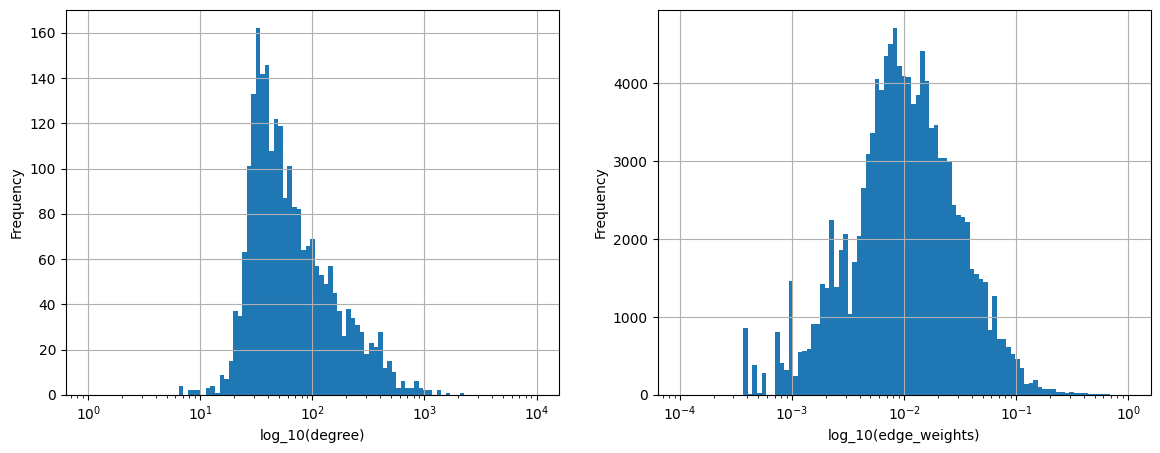

In [69]:
graphSummary(entityGraph, 100, plot_edge_weight=True, use_log_y=False)

In [70]:
degrees = pd.Series({k: v for k, v in nx.degree(entityGraph)}, name="degree")

In [71]:
filteredEntityGraph = entityGraph.edge_subgraph(
    [edge for edge in entityGraph.edges if entityGraph.edges[edge]["weight"]>0.05]
)

In [72]:
print(nx.info(filteredEntityGraph))

Name: 
Type: Graph
Number of nodes: 2267
Number of edges: 8111
Average degree:   7.1557


Name: 
Type: Graph
Number of nodes: 2267
Number of edges: 8111
Average degree:   7.1557


/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


(0.01, 8)

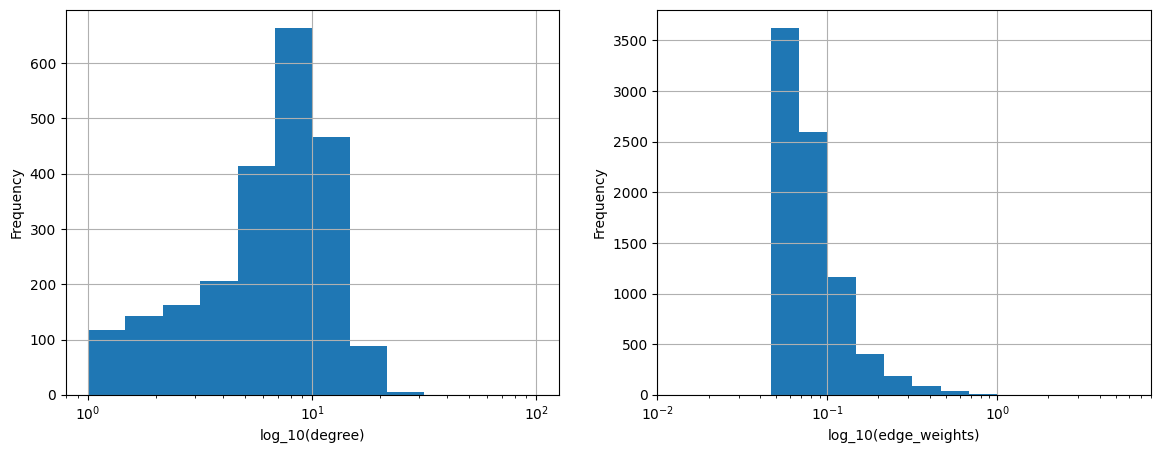

In [73]:
graphSummary(filteredEntityGraph, 13, plot_edge_weight=True, use_log_y=False)
plt.xlim([0.01,8])

#### Local and global properties of the graph 

In [74]:
globalKpis = [{
    "shortest_path": nx.average_shortest_path_length(_graph),
    "clustering_coefficient": nx.average_clustering(_graph),
    "global_efficiency": nx.global_efficiency(_graph)
} for components in nx.connected_components(filteredEntityGraph) 
    for _graph in [nx.subgraph(filteredEntityGraph, components)]]

In [75]:
pd.concat([
    pd.DataFrame(globalKpis), 
    pd.Series([len(c) for c in nx.connected_components(filteredEntityGraph)])
], axis=1)

,shortest_path,clustering_coefficient,global_efficiency,0
0,4.722114,0.21808,0.227060,2251
1,1.000000,0.00000,1.000000,2
2,1.600000,0.00000,0.700000,5
3,1.000000,0.00000,1.000000,2
4,1.000000,0.00000,1.000000,2
5,1.333333,0.00000,0.833333,3
6,1.000000,0.00000,1.000000,2


In [76]:
pd.Series([len(c) for c in nx.connected_components(filteredEntityGraph)]).sum()

2267

In [77]:
globalKpis[0]

{'shortest_path': 4.722114220840121,
 'clustering_coefficient': 0.21807986369292282,
 'global_efficiency': 0.22705958936010567}

In [78]:
# nx.write_gexf(filteredEntityGraph, "filteredEntityGraph.gexf")

In [79]:
betweeness = nx.betweenness_centrality(filteredEntityGraph)

In [80]:
_betweeness = pd.Series(betweeness, name="betweeness")

/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


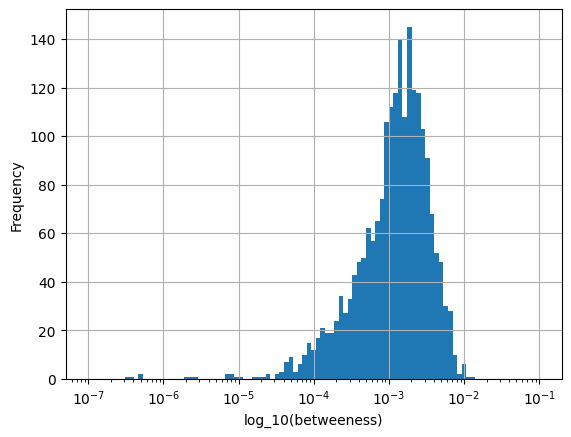

In [81]:
plotDistribution(_betweeness[_betweeness>0], 100)

In [82]:
pageRanks = pd.Series(nx.pagerank(filteredEntityGraph))

In [83]:
degrees = pd.Series({k: v for k, v in nx.degree(filteredEntityGraph)})

In [84]:
kpis = pd.concat({
    "pageRank": pageRanks, 
    "degrees": degrees, 
    "betweeness": _betweeness
}, axis=1)

In [85]:
kpis["pageRank"].head()

uae             0.000603
spokeswoman     0.000279
compensation    0.000595
wholly          0.000380
brazilian       0.000223
Name: pageRank, dtype: float64

(1e-05, 0.02)

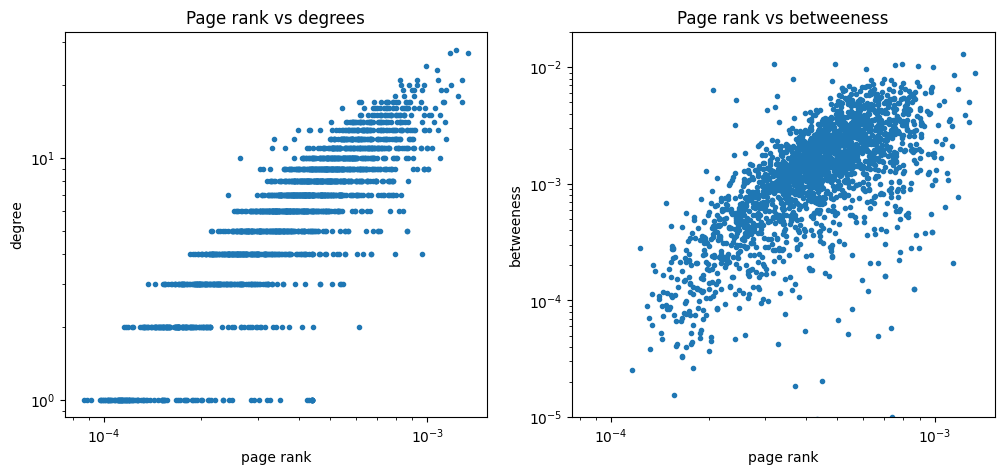

In [86]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title("Page rank vs degrees")
plt.plot(kpis["pageRank"].values, kpis["degrees"].values, '.', color="tab:blue")
plt.xlabel("page rank")
plt.ylabel("degree")
plt.xscale("log")
plt.yscale("log")

plt.subplot(1,2,2)
plt.title("Page rank vs betweeness")
plt.plot(kpis["pageRank"].values, kpis["betweeness"].values, '.', color="tab:blue")
plt.xlabel("page rank")
plt.ylabel("betweeness")
plt.xscale("log")
plt.yscale("log")
plt.ylim([1E-5, 2E-2])

#### Visualization of the Network

In [87]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(filteredEntityGraph)

In [88]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

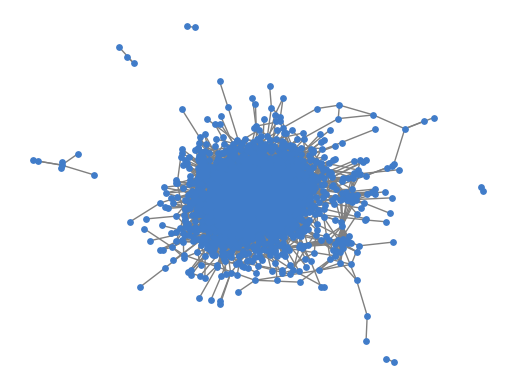

In [89]:
plt.axis("off")
nx.draw_networkx(filteredEntityGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

#### Community detection

In [90]:
import community

In [91]:
communities = pd.Series(community.best_partition(filteredEntityGraph))

Text(0, 0.5, '# Members')

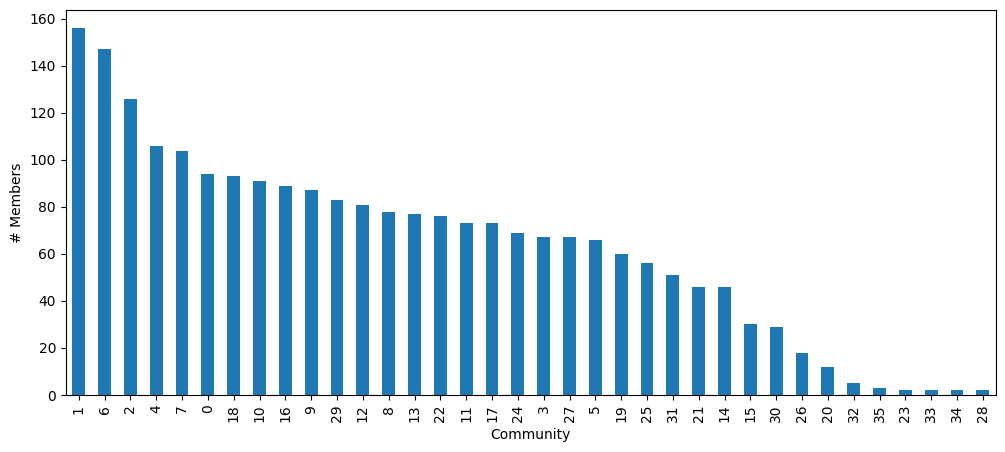

In [92]:
communities.value_counts().sort_values(ascending=False).plot(kind="bar", figsize=(12, 5))
plt.xlabel("Community")
plt.ylabel("# Members")

In [93]:
for comm_index in set(communities.values):
    nodes = communities[communities==comm_index].index
    print(f"{comm_index}:" + ",".join(nodes[:10]))

0:uae,pretax profit,gcc,profitable,iranian,bahrain,merchant,portugal,saudi arabia,arabian
1:spokeswoman,rand,television,billion marks,schlesinger,g-7,majority,anti,und,reporters
2:compensation,plan,previously announced,real estate,jwt,pan,colonial,paid,undisclosed,democrat
3:wholly,realty,excluding,sanctions,commercial,times,williams,reflected,depressed,administration
4:brazilian,newspaper,better,intervened,subroto,talks,drug,ceiling,actively,arango
5:yugoslavia,equipment,dome,allis,nova,sec,petroleum,america,pak,mississippi
6:oklahoma,railroad,magazine,shipbuilding,soybean,area,plains,previous,temperatures,dry
7:drill,small,group net,mint,acres,acre,net income,eagle,glass,aug
8:assistance,acquire,carl,emery,western,application,carson,orange,the bank of england,fcoj
9:moscow,maximum,india,agriculture,indian,ministers,senate,mln tonnes,usda,offering
10:dispute,wagner,recapitalization,harcourt,reynolds,reed,jersey,salomon,bancroft,broadcast
11:value,miguel,jordan,guarantee,scheduled,prog

In [94]:
comm_index = communities.loc["turkish"]
nodes = communities[communities==comm_index].index

In [95]:
smallGrap = nx.subgraph(filteredEntityGraph, nbunch=nodes)

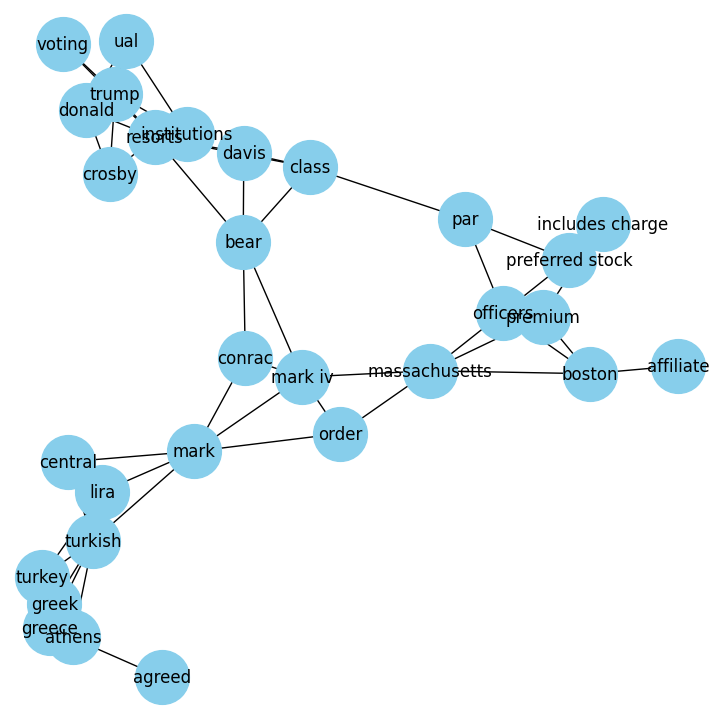

In [96]:
plt.figure(figsize=(7,7))

pos = nx.spring_layout(smallGrap) # k regulates the distance between nodes

nx.draw(smallGrap, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

# plt.show()
# plt.savefig(os.path.join(".", "CloseUp.png"), dpi=300, format="png")

Here we show a Bipartite Closeup of the cluster

In [97]:
bipartiteCloseup = subGraph.edge_subgraph(
    {e for e in subGraph.edges() if len(set(e).intersection(nodes))>0}
)

deg = nx.degree(bipartiteCloseup)

smallGrap = nx.subgraph(bipartiteCloseup, {n for n, d in bipartiteCloseup.nodes(data=True) if d["bipartite"]==1 or deg[n]>1})

In [98]:
len([n for n, d in bipartiteCloseup.nodes(data=True) if d["bipartite"]==0])

299

In [99]:
len(nodes)

30

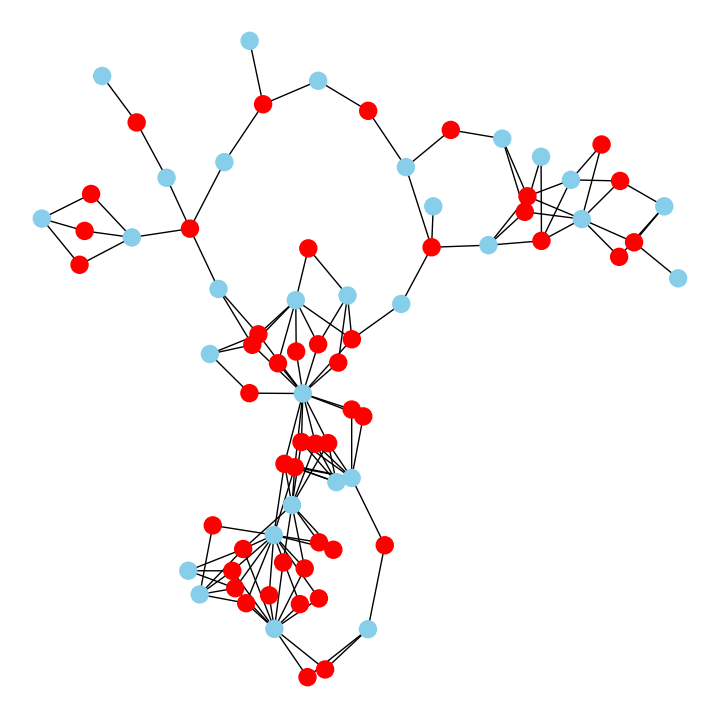

In [100]:
plt.figure(figsize=(7,7))

pos = nx.kamada_kawai_layout(smallGrap) # k regulates the distance between nodes

node_color = ["skyblue" if d["bipartite"]==1 else "red" for n, d in smallGrap.nodes(data=True)]

nx.draw(smallGrap, with_labels=False, node_color=node_color, #'skyblue', 
        node_size=150, edge_cmap=plt.cm.Blues, pos = pos)


# plt.show()
# plt.savefig(os.path.join(".", "BipartiteCloseUp.png"), dpi=300, format="png")

Analysis of the relation between Turkey and Greece

In [101]:
doc_ids_turkey=list(nx.neighbors(smallGrap, "turkey"))
doc_ids_greece=list(nx.neighbors(smallGrap, "greece"))

doc_ids=set(doc_ids_turkey).intersection(doc_ids_greece)

corpus.loc[list(doc_ids)]

,clean_text,label,language,parsed,triplets,keywords
id,,,,,,
training/10539,NATO CALLS ON GREECE AND TURKEY TO AVOID FORCE...,"[crude, ship]",en,"(NATO, CALLS, ON, GREECE, AND, TURKEY, TO, AVO...","[(CALLS, (AVOID, False), Greece), (CALLS, (AVO...","[(situation, 0.2472109039575448), (carrington,..."
training/10395,PAPANDREOU SAYS GREEKS READY FOR AGGRESSORS G...,"[crude, ship]",en,"(PAPANDREOU, SAYS, GREEKS, READY, FOR, AGGRESS...","[(PAPANDREOU, (SAYS, False), READY), (Papandre...","[(greek, 0.3887438310146141), (papandreou, 0.2..."
training/10621,"PAPANDREOU SHOWS ""RESTRICTED OPTIMISM"" OVER CR...","[crude, ship]",en,"(PAPANDREOU, SHOWS, "", RESTRICTED, OPTIMISM, ""...","[(Papandreou, (expressed, False), optimism), (...","[(greek, 0.38800525497567984), (leader, 0.2340..."
training/10797,GREECE SCRAPS U.S. BASE CLOSURE REQUEST Prime...,"[crude, ship]",en,"(GREECE, SCRAPS, U.S., BASE, CLOSURE, REQUEST,...","[(Papandreou, (withdrawn, False), request), (r...","[(papandreou, 0.25551082676438086), (aegean, 0..."
training/10627,"TURKISH-GREEK AEGEAN TENSION ABATES Turkey""s ...","[crude, ship]",en,"(TURKISH, -, GREEK, AEGEAN, TENSION, ABATES, ...","[(TENSION, (ABATES, False), standoff), (Turkey...","[(aegean, 0.2606324396779156), (said, 0.245027..."
training/10641,TURKEY LIFTS SURVEY SHIP ESCORT AS TENSION ABA...,"[crude, ship]",en,"(TURKEY, LIFTS, SURVEY, SHIP, ESCORT, AS, TENS...","[(ESCORT, (pulled, False), warships), (Turkey,...","[(turkish waters, 0.2064748955978376), (rights..."
test/15200,TURKEY CALLS FOR DIALOGUE TO SOLVE DISPUTE Tu...,[crude],en,"(TURKEY, CALLS, FOR, DIALOGUE, TO, SOLVE, DISP...","[(agreement, (effect, False), security), (coun...","[(said, 0.2734395997182076), (turkey, 0.231337..."
training/835,GREECE SAYS IT HAS RIGHT ON AEGEAN OIL DRILLIN...,[crude],en,"(GREECE, SAYS, IT, HAS, RIGHT, ON, AEGEAN, OIL...","[(warning, (conducting, False), activities), (...","[(greek, 0.32157298143397534), (aegean, 0.2623..."


#### Embeddings

Using TSNE

In [103]:
from node2vec import Node2Vec

node2vec = Node2Vec(filteredEntityGraph, dimensions=5, num_walks=200, workers=4, quiet=True) 
model = node2vec.fit(window=10) 
embeddings = model.wv 

Generating walks (CPU: 1): 100%|███████████████████████████████████████| 500/500 [40:26<00:00,  4.85s/it]


In [104]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
embedding2d=tsne.fit_transform(embeddings.vectors)

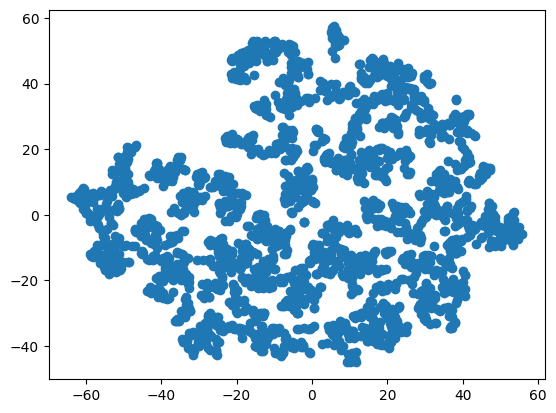

In [105]:
plt.plot(embedding2d[:, 0], embedding2d[:, 1], 'o')

Using Node2Vec

Node2Vec allows also to compute a similarity between entities

In [106]:
embeddings.most_similar(positive=["turkey"])

[('adjustments', 0.9959986805915833),
 ('governments', 0.9918233752250671),
 ('greece', 0.9860679507255554),
 ('agreed', 0.9789270162582397),
 ('greek', 0.9773082733154297),
 ('franc', 0.9757379293441772),
 ('inch', 0.9734088182449341),
 ('problems', 0.9733425974845886),
 ('damage', 0.9668214917182922),
 ('athens', 0.9657086730003357)]

### Document-Document Graph Projection

In [107]:
from networkx.algorithms.bipartite.projection import overlap_weighted_projected_graph

In [108]:
documentGraph = overlap_weighted_projected_graph(
    G, 
    {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
)

In [109]:
from matplotlib import pyplot as plt

In [110]:
print(nx.info(documentGraph))

Name: 
Type: Graph
Number of nodes: 10788
Number of edges: 13061229
Average degree: 2421.4366


In [111]:
degrees = pd.Series({k: v for k, v in nx.degree(documentGraph)}, name="degree")

In [112]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in documentGraph.edges(data=True)}, name="edge_weight")

/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


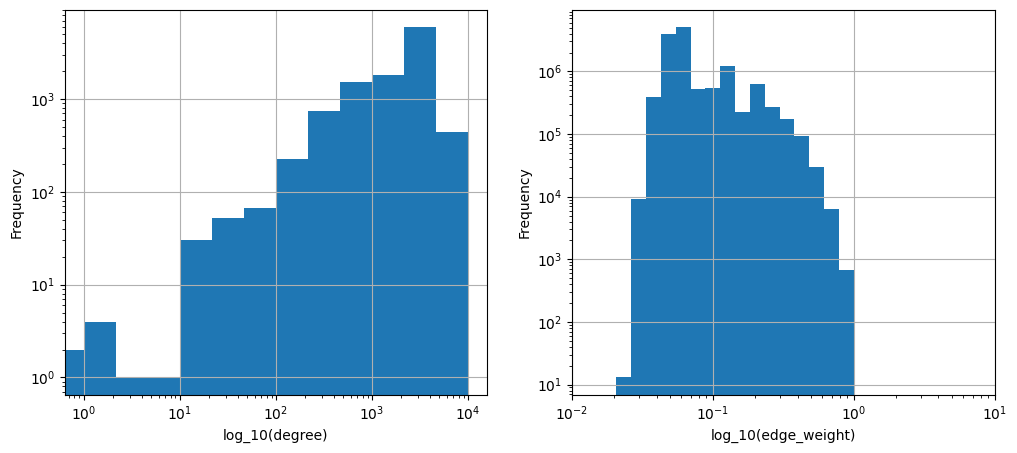

In [113]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13, minValue=1E0)
plt.yscale("log")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")

In [114]:
filteredDocumentGraph = documentGraph.edge_subgraph(
    allEdgesWeights[(allEdgesWeights>0.6)].index.tolist()
)

In [115]:
print(nx.info(filteredDocumentGraph))

Name: 
Type: Graph
Number of nodes: 1942
Number of edges: 7961
Average degree:   8.1988


#### Global and Local Properties

In [116]:
degrees = pd.Series({k: v for k, v in nx.degree(filteredDocumentGraph)}, name="degree")

In [117]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in filteredDocumentGraph.edges(data=True)}, name="edge_weight")

/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


(0.1, 2)

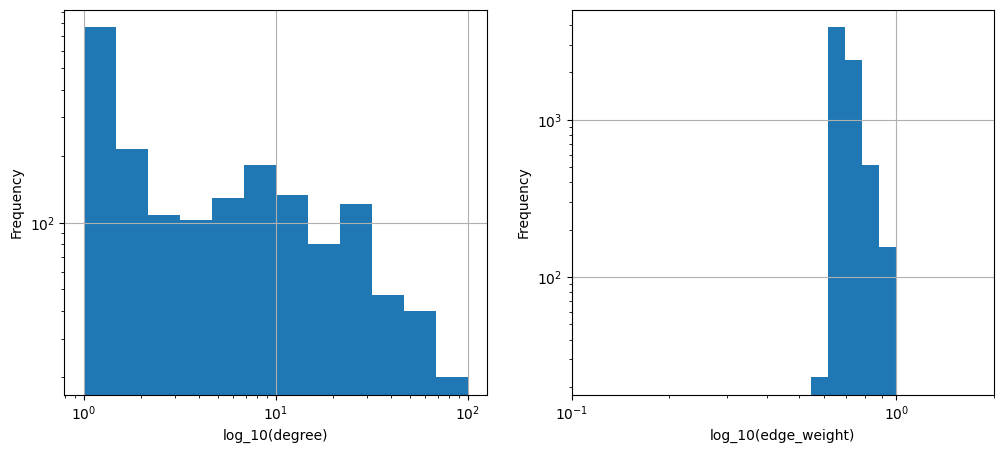

In [118]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13, minValue=1E0)
plt.yscale("log")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.xlim([0.1, 2])

#### Core - Periphery Description and Analysis

In [119]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(filteredDocumentGraph)

In [120]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

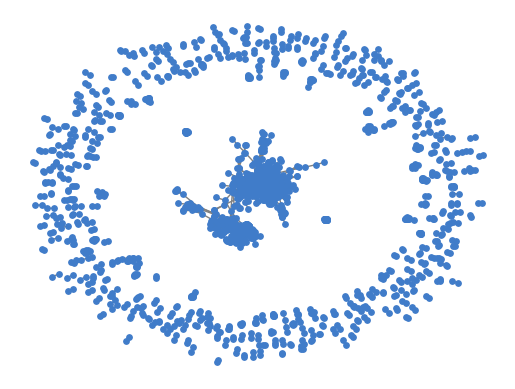

In [121]:
plt.axis("off")
nx.draw_networkx(filteredDocumentGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

In [122]:
components = pd.Series({ith: component 
              for ith, component in enumerate(nx.connected_components(filteredDocumentGraph))})

In [123]:
components_size = components.apply(len)
components_size.name = "size"

/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


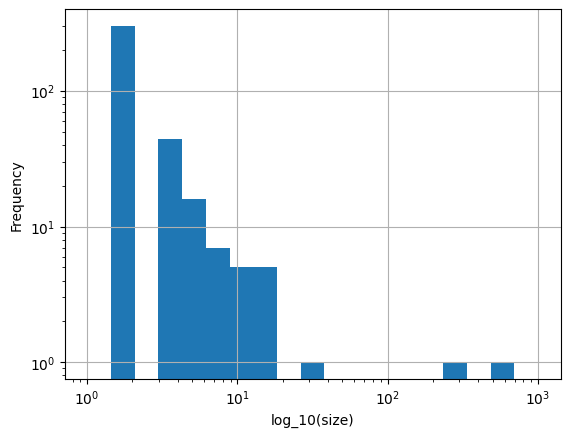

In [124]:
plotDistribution(components_size, nbins=20)
plt.yscale("log")

In [125]:
coreDocumentGraph = nx.subgraph(
    filteredDocumentGraph,
    [node for nodes in components[components.apply(len)>8].values for node in nodes]
)

In [126]:
print(nx.info(coreDocumentGraph))

Name: 
Type: Graph
Number of nodes: 1053
Number of edges: 7198
Average degree:  13.6714


In [127]:
degrees = pd.Series({k: v for k, v in nx.degree(coreDocumentGraph)})

/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


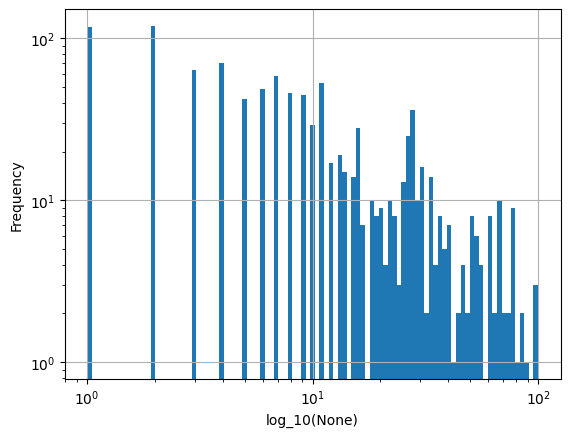

In [128]:
plotDistribution(degrees, 100, minValue=1E0)
plt.yscale("log")

In [129]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in coreDocumentGraph.edges(data=True)})

/home/deusebio/.pyenv/versions/graph-machine-learning/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


(0.1, 1)

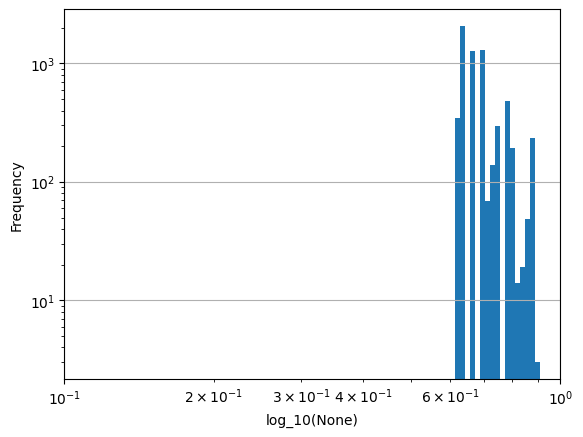

In [130]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-1, 1])

In [131]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(coreDocumentGraph)

In [132]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

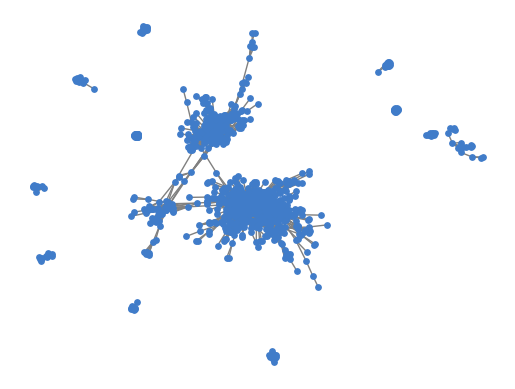

In [133]:
plt.axis("off")
nx.draw_networkx(coreDocumentGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

#### Community Detection and Topics Clustering

In [134]:
import community

In [135]:
communities = pd.Series(community.best_partition(filteredDocumentGraph))

In [136]:
communities.value_counts().sort_values(ascending=False)

4      194
14     167
13     155
2      123
16     100
      ... 
348      2
350      2
373      2
374      2
262      2
Name: count, Length: 390, dtype: int64

In [137]:
from collections import Counter

def getTopicRatio(df):
    return Counter([label for labels in df["label"] for label in labels])

In [138]:
communityTopics = pd.DataFrame.from_dict({
    cid: getTopicRatio(corpus.loc[comm.index])
    for cid, comm in communities.groupby(communities)
}, orient="index")

In [139]:
normalizedCommunityTopics = (communityTopics.T / communityTopics.sum(axis=1)).T

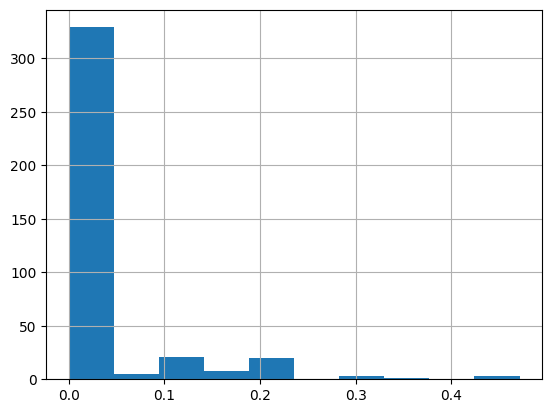

In [140]:
normalizedCommunityTopics.std(axis=1).fillna(0).hist()

In [141]:
normalizedCommunityTopics.shape

(390, 58)

Text(0, 0.5, 'Frequency')

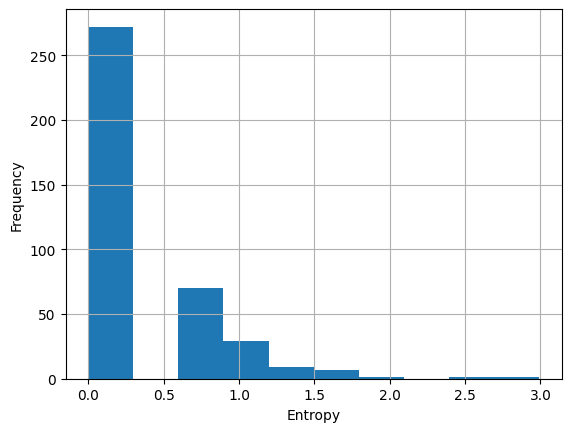

In [142]:
normalizedCommunityTopics.apply(lambda x: np.mean(-np.log(x)), axis=1).hist()
plt.xlabel("Entropy")
plt.ylabel("Frequency")

In [143]:
topicsCorrelation = normalizedCommunityTopics.corr().fillna(0)
topicsCorrelation[topicsCorrelation<0.8]=0

In [144]:
topicsGraph = nx.from_pandas_adjacency(topicsCorrelation)

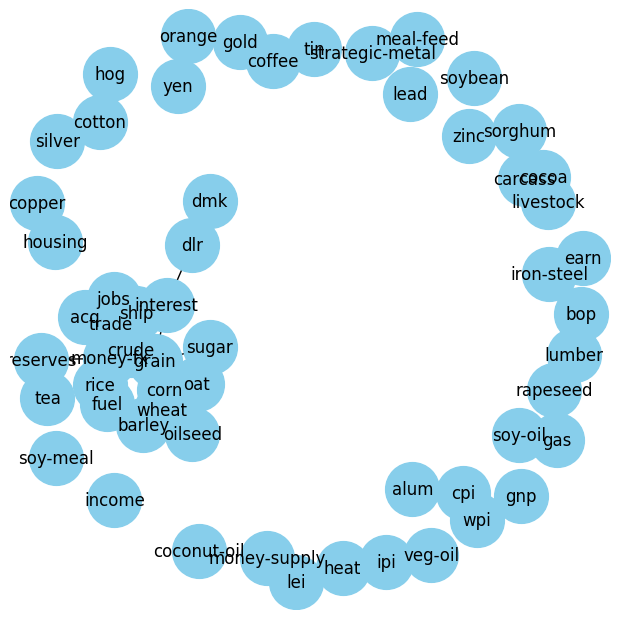

In [145]:
plt.figure(figsize=(6,6))

pos = nx.spring_layout(topicsGraph, k=0.3) # k regulates the distance between nodes

nx.draw(topicsGraph, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

# plt.show()
# plt.savefig(os.path.join(".", "TopicsAll.png"), dpi=300, format="png")

In [146]:
filteredTopicsGraph = nx.subgraph(
    topicsGraph,
    [node for component in nx.connected_components(topicsGraph) if len(component)>3 for node in component]
)

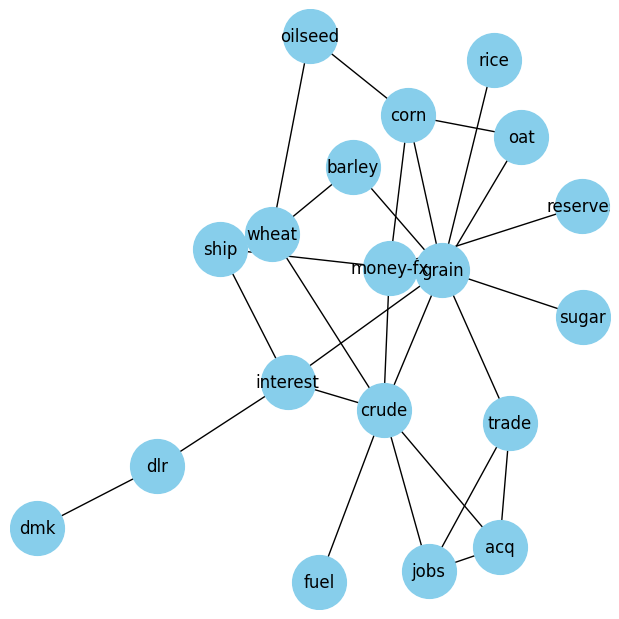

In [147]:
plt.figure(figsize=(6,6))

pos = nx.kamada_kawai_layout(filteredTopicsGraph) # k regulates the distance between nodes

nx.draw(filteredTopicsGraph, with_labels=True, node_color='skyblue', node_size=1500, 
        edge_cmap=plt.cm.Blues, pos = pos)

# plt.show()￼
# plt.savefig(os.path.join(".", "TopicsCore.png"), dpi=300, format="png")

#### Embeddings for the Document-Document Graph

In [148]:
from node2vec import Node2Vec

node2vec = Node2Vec(coreDocumentGraph, dimensions=20) 
model = node2vec.fit(window=10) 
embeddings = model.wv 

Generating walks (CPU: 1): 100%|█████████████████████████████████████████| 10/10 [00:20<00:00,  2.09s/it]


In [149]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [150]:
embedding2d=tsne.fit_transform(embeddings.vectors)

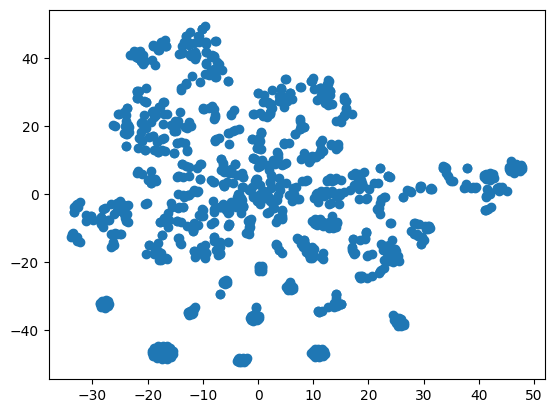

In [151]:
plt.plot(embedding2d[:, 0], embedding2d[:, 1], 'o')

In [152]:
pd.DataFrame(embeddings.vectors)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-6.737473,3.506645,1.100792,5.476943,-3.338335,0.276633,-1.078069,2.903708,1.336813,-3.476732,1.427167,-0.266681,-0.471343,0.184137,-2.069631,-0.574260,-0.738087,3.788915,-1.683529,-4.035486
1,-6.560338,3.352505,0.892895,4.764644,-3.183715,0.292796,-1.101001,3.044708,2.059587,-3.483480,1.353684,-0.584850,-0.158013,0.018590,-1.647612,-0.788695,-0.325296,3.511575,-1.597107,-3.987545
2,-6.648391,3.095893,0.785576,5.412939,-3.564779,-0.057957,-0.688464,2.905470,1.557411,-3.210068,0.827968,-0.532490,0.003652,-0.121509,-1.665959,-0.950425,-0.382220,4.117815,-1.906440,-3.899600
3,-6.391430,1.779750,0.462306,2.715431,-2.103771,-1.989185,-1.984643,0.105770,4.286595,-3.886077,-0.450857,0.282356,-1.321213,3.158543,0.123383,-0.627238,1.957629,3.836007,-2.467475,-0.543244
4,-5.361574,0.622695,0.208257,-3.572732,0.091671,-1.721061,1.046673,2.048406,4.613693,-1.404773,2.801529,2.242345,1.547014,6.425769,-2.543316,-0.761218,2.574573,5.359656,-1.035850,-3.710101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.129688,0.868474,0.158408,0.148159,0.302053,0.617617,-1.176051,-0.358285,-0.874892,-0.830270,-1.113515,-0.046454,0.627627,-1.529335,-0.654220,-0.372447,0.006526,-0.608662,0.442872,-0.374222
1049,0.207729,-0.256361,-0.847864,0.055823,-0.062639,-0.489831,0.296728,0.145687,-1.076312,-0.194407,-0.076653,0.206450,-0.603945,0.863203,0.882457,0.478035,-0.592900,-1.803185,0.490716,1.043012
1050,0.989873,0.660073,0.298057,0.014688,0.094849,0.229320,0.049907,0.450760,-0.672756,-0.095832,0.664670,0.030931,0.212077,0.508668,-0.015358,-0.273089,-0.043678,-0.976209,0.072014,0.067489
1051,0.597600,-0.274929,-0.519920,0.653873,0.242664,0.253243,-0.371124,0.603747,-0.012600,0.302335,-0.660933,-0.391477,0.386280,0.251975,0.099648,0.507324,0.229800,-1.581192,-0.340255,-0.109365


In [153]:
pd.DataFrame(embeddings.vectors, index=embeddings.index2word)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
test/20368,-6.737473,3.506645,1.100792,5.476943,-3.338335,0.276633,-1.078069,2.903708,1.336813,-3.476732,1.427167,-0.266681,-0.471343,0.184137,-2.069631,-0.574260,-0.738087,3.788915,-1.683529,-4.035486
test/20221,-6.560338,3.352505,0.892895,4.764644,-3.183715,0.292796,-1.101001,3.044708,2.059587,-3.483480,1.353684,-0.584850,-0.158013,0.018590,-1.647612,-0.788695,-0.325296,3.511575,-1.597107,-3.987545
test/20442,-6.648391,3.095893,0.785576,5.412939,-3.564779,-0.057957,-0.688464,2.905470,1.557411,-3.210068,0.827968,-0.532490,0.003652,-0.121509,-1.665959,-0.950425,-0.382220,4.117815,-1.906440,-3.899600
test/20800,-6.391430,1.779750,0.462306,2.715431,-2.103771,-1.989185,-1.984643,0.105770,4.286595,-3.886077,-0.450857,0.282356,-1.321213,3.158543,0.123383,-0.627238,1.957629,3.836007,-2.467475,-0.543244
training/3971,-5.361574,0.622695,0.208257,-3.572732,0.091671,-1.721061,1.046673,2.048406,4.613693,-1.404773,2.801529,2.242345,1.547014,6.425769,-2.543316,-0.761218,2.574573,5.359656,-1.035850,-3.710101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
training/1134,0.129688,0.868474,0.158408,0.148159,0.302053,0.617617,-1.176051,-0.358285,-0.874892,-0.830270,-1.113515,-0.046454,0.627627,-1.529335,-0.654220,-0.372447,0.006526,-0.608662,0.442872,-0.374222
training/4956,0.207729,-0.256361,-0.847864,0.055823,-0.062639,-0.489831,0.296728,0.145687,-1.076312,-0.194407,-0.076653,0.206450,-0.603945,0.863203,0.882457,0.478035,-0.592900,-1.803185,0.490716,1.043012
training/11154,0.989873,0.660073,0.298057,0.014688,0.094849,0.229320,0.049907,0.450760,-0.672756,-0.095832,0.664670,0.030931,0.212077,0.508668,-0.015358,-0.273089,-0.043678,-0.976209,0.072014,0.067489
training/5914,0.597600,-0.274929,-0.519920,0.653873,0.242664,0.253243,-0.371124,0.603747,-0.012600,0.302335,-0.660933,-0.391477,0.386280,0.251975,0.099648,0.507324,0.229800,-1.581192,-0.340255,-0.109365


In [154]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 25931
Number of edges: 100712
Average degree:   7.7677


Extracting the embeddings to be used in shallow-learning models. Please do vary the *dimensions* and the *window* parameters to generate multiple combination to be cross-validated

In [155]:
from pathlib import Path
Path("./embeddings").mkdir(parents=True, exist_ok=True)

In [ ]:
from node2vec import Node2Vec

dimensions = 10
window = 20

node2vec = Node2Vec(G, dimensions=dimensions, num_walks=10, workers=4, quiet=True) 
model = node2vec.fit(window=window) 
embeddings = model.wv 

pd.DataFrame(embeddings.vectors, index=embeddings.index2word)\
    .to_pickle(f"./embeddings/bipartiteGraphEmbeddings_{dimensions}_{window}.p")